Import necessary libraries for data handling, machine learning models, hyperparameter tuning, and evaluation

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from scipy.stats import randint, uniform
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt




Load the dataset and drop rows where the target variable (Job status) is missing


In [2]:
# Load data
data = pd.read_excel(r'C:\\Users\\HP\\Desktop\\final project12.xlsx')

In [3]:
# Drop rows with missing target values
data.dropna(subset=['Job status'], inplace=True)


Define Features and Target
Separate the features (X) and the target variable (y).

In [4]:
# Define features and target
X = data.drop(columns=['Job status', 'No'])
y = data['Job status']


In [5]:
# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



Define Categorical and Numerical Columns
Specify which columns are categorical and which are numerical

In [6]:
# Define categorical and numerical columns
categorical_cols = ['Sex', 'Label', 'Status', 'College', 'Fild of Study']
numerical_cols = ['Salary', 'age', 'year_of_service']

Preprocessing Pipelines
Define how to preprocess numerical and categorical data: impute missing values and one-hot encode categorical features.

In [7]:
# Preprocessing for numerical data: impute missing values with mean
numerical_transformer = SimpleImputer(strategy='mean')

In [8]:
# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [9]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Convert Sparse Matrix to Dense
Define a function to convert sparse matrices to dense format, which is necessary for certain algorithms

In [10]:
# Function to convert sparse matrix to dense
def to_dense(X):
    return X.toarray() if hasattr(X, "toarray") else X

dense_transformer = FunctionTransformer(to_dense)

Split the dataset into training and testing sets

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Define a dictionary of models to evaluate. Naive Bayes requires a pipeline with preprocessing and conversion to dense format

In [12]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('to_dense', dense_transformer),
        ('classifier', GaussianNB())
    ]),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

Evaluate Each Model
Loop through each model, create a pipeline, train the model, and print the classification report

In [13]:
# Evaluate each model
for name, model in models.items():
    if name == 'Naive Bayes':
        clf = model
    else:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict and evaluate the model
    y_pred = clf.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("="*60)

Model: Logistic Regression
                precision    recall  f1-score   support

not terminated       0.91      0.95      0.93       607
    terminated       0.87      0.78      0.82       263

      accuracy                           0.90       870
     macro avg       0.89      0.87      0.88       870
  weighted avg       0.90      0.90      0.90       870

Model: Decision Tree
                precision    recall  f1-score   support

not terminated       0.96      0.95      0.96       607
    terminated       0.89      0.90      0.90       263

      accuracy                           0.94       870
     macro avg       0.92      0.93      0.93       870
  weighted avg       0.94      0.94      0.94       870

Model: Random Forest
                precision    recall  f1-score   support

not terminated       0.96      0.96      0.96       607
    terminated       0.91      0.90      0.90       263

      accuracy                           0.94       870
     macro avg       0.93  

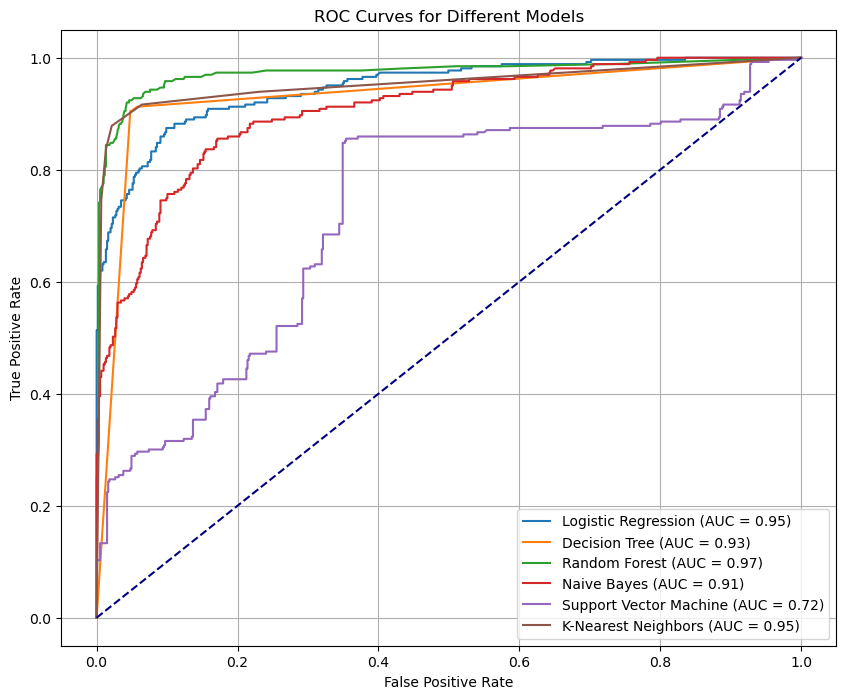

Logistic Regression: ROC AUC = 0.95
Decision Tree: ROC AUC = 0.93
Random Forest: ROC AUC = 0.97
Naive Bayes: ROC AUC = 0.91
Support Vector Machine: ROC AUC = 0.72
K-Nearest Neighbors: ROC AUC = 0.95


In [14]:

# Define categorical and numerical columns
categorical_cols = ['Sex', 'Label', 'Status', 'College', 'Fild of Study']
numerical_cols = ['Salary', 'age', 'year_of_service']

# Preprocessing for numerical data: impute missing values with mean
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Function to convert sparse matrix to dense
def to_dense(X):
    return X.toarray() if hasattr(X, "toarray") else X

dense_transformer = FunctionTransformer(to_dense)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('to_dense', dense_transformer),
        ('classifier', GaussianNB())
    ]),
    'Support Vector Machine': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Initialize a dictionary to store ROC AUC scores
roc_auc_scores = {}

plt.figure(figsize=(10, 8))

# Evaluate each model
for name, model in models.items():
    if name == 'Naive Bayes':
        clf = model
    else:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, 'predict_proba') else clf.decision_function(X_test)
    
    # Compute ROC curve and ROC AUC score
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores[name] = roc_auc
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()

# Print ROC AUC scores for comparison
for model_name, auc_score in roc_auc_scores.items():
    print(f"{model_name}: ROC AUC = {auc_score:.2f}")

Hyperparameter tuning for Decision Tree
Set up and execute a grid search for the Decision Tree, print the best parameters and cross-validation accuracy, evaluate the tuned model, and save it.

In [15]:
# Hyperparameter tuning for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', dt)])

param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'auto', 'sqrt', 'log2']
}

grid_search_dt = GridSearchCV(estimator=pipeline_dt, param_grid=param_grid_dt, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best parameters for Decision Tree: ", best_params_dt)
print("Best cross-validation accuracy for Decision Tree: {:.2f}".format(best_score_dt))

best_dt = grid_search_dt.best_estimator_

y_pred_dt = best_dt.predict(X_test)
print("Tuned Decision Tree Model:")
print(classification_report(y_test, y_pred_dt))
print("="*60)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters for Decision Tree:  {'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__splitter': 'best'}
Best cross-validation accuracy for Decision Tree: 0.94
Tuned Decision Tree Model:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       607
           1       0.90      0.90      0.90       263

    accuracy                           0.94       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.94      0.94      0.94       870



save the tuned decision tree model

In [16]:
joblib.dump(best_dt, 'best_decision_tree_model.pkl')

['best_decision_tree_model.pkl']

 Hyperparameter tuning for KNN by GridSearch

In [17]:

knn = KNeighborsClassifier()
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': [20, 30, 40, 50],
    'classifier__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

grid_search_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, 
                               cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best parameters for KNN: ", best_params_knn)
print("Best cross-validation accuracy for KNN: {:.2f}".format(best_score_knn))

best_knn = grid_search_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)
print("Tuned KNN Model:")
print(classification_report(y_test, y_pred_knn))
print("="*60)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best parameters for KNN:  {'classifier__algorithm': 'auto', 'classifier__leaf_size': 20, 'classifier__n_neighbors': 5, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best cross-validation accuracy for KNN: 0.94
Tuned KNN Model:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       607
           1       0.93      0.89      0.91       263

    accuracy                           0.95       870
   macro avg       0.94      0.93      0.94       870
weighted avg       0.95      0.95      0.95       870



save the tuned model

In [18]:
joblib.dump(best_knn, 'best_knn_model.pkl')

['best_knn_model.pkl']

Hyperparameter tuning for KNN with RandomizedSearchCV

In [19]:

knn = KNeighborsClassifier()
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])

param_dist_knn = {
    'classifier__n_neighbors': randint(1, 30),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size': randint(10, 100),
    'classifier__p': randint(1, 3)  # 1 for Manhattan distance, 2 for Euclidean distance
}

random_search_knn = RandomizedSearchCV(estimator=pipeline_knn, param_distributions=param_dist_knn, 
                                       n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

random_search_knn.fit(X_train, y_train)

best_params_knn = random_search_knn.best_params_
best_score_knn = random_search_knn.best_score_

print("Best parameters for KNN: ", best_params_knn)
print("Best cross-validation accuracy for KNN: {:.2f}".format(best_score_knn))

best_knn = random_search_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test)
print("Tuned KNN Model:")
print(classification_report(y_test, y_pred_knn))
print("="*60)



Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")


Best parameters for KNN:  {'classifier__algorithm': 'kd_tree', 'classifier__leaf_size': 38, 'classifier__n_neighbors': 4, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best cross-validation accuracy for KNN: 0.94
Tuned KNN Model:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       607
           1       0.94      0.90      0.92       263

    accuracy                           0.95       870
   macro avg       0.95      0.94      0.94       870
weighted avg       0.95      0.95      0.95       870



Save the tuned KNN model

In [20]:

joblib.dump(best_knn, 'best_knn_model2.pkl')

['best_knn_model2.pkl']

In [21]:

# Load the KNN model
loaded_model = joblib.load('best_knn_model2.pkl')







In [22]:
# Read data from the Excel sheet (replace 'your_excel_file.xlsx' with the actual file path)
df = pd.read_excel(r'C:\Users\HP\Desktop\hr merged not cleaned\to be predicted.xlsx')

In [23]:
# Predict job status
df['job status'] = loaded_model.predict(df[['Sex', 'Label', 'Status', 'College', 'Fild of Study','Salary', 'age', 'year_of_service']])


In [24]:
# Map predictions to human-readable labels
df['job status'] = df['job status'].map({1: 'Terminated', 0: 'Not Terminated'})



In [26]:
#Save to new sheet
df.to_excel('C:/Users/HP/Desktop/new/new_data_with_predictions.xlsx', index=True)

print("Predictions saved to 'predicted_jobs.xlsx'")

Predictions saved to 'predicted_jobs.xlsx'
